In [1]:
pwd

'C:\\Users\\607942840\\Desktop\\Release_Directory\\Python\\practice_projects_data_analysis\\election_analysis'

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#to grab data from web use these libraries
import requests
from io import StringIO
#import webbrowser
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
#webbrowser.open(url)
source = requests.get(url).text

poll_data = StringIO(source)

In [4]:
poll_df = pd.read_csv(poll_data)

In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [7]:
poll_df.shape

(586, 17)

In [8]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [9]:
poll_df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney',
       'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

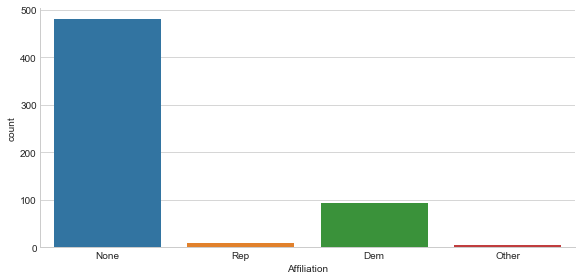

In [10]:
sns.factorplot('Affiliation',data=poll_df,kind='count',aspect=2)

In [11]:
poll_df['Population'].unique()

array(['Likely Voters', 'Registered Voters', 'Adults',
       'Likely Voters - Republican'], dtype=object)

In [12]:
np.unique(poll_df['Population'])

array(['Adults', 'Likely Voters', 'Likely Voters - Republican',
       'Registered Voters'], dtype=object)

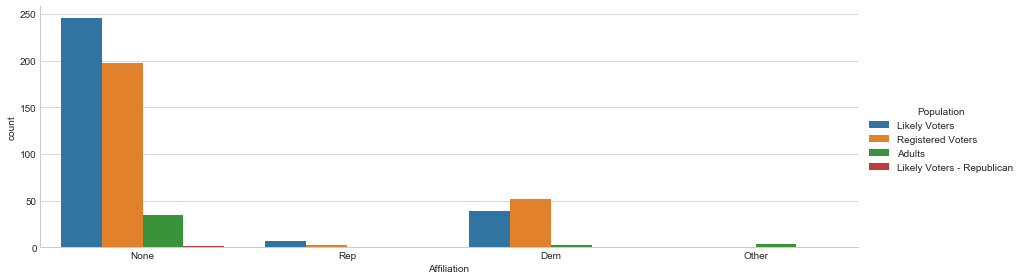

In [13]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count',aspect=3)

In [14]:
avg = poll_df.mean()

In [15]:
avg = pd.DataFrame(avg)

In [16]:
avg.T

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
0,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0


In [17]:
avg.index

Index(['Number of Observations', 'Obama', 'Romney', 'Undecided', 'Other',
       'Question Text', 'Question Iteration'],
      dtype='object')

In [18]:
avg.drop('Number of Observations',inplace=True)

In [19]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [20]:
std = pd.DataFrame(poll_df.std())

In [21]:
std.drop('Number of Observations',inplace=True)

In [22]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


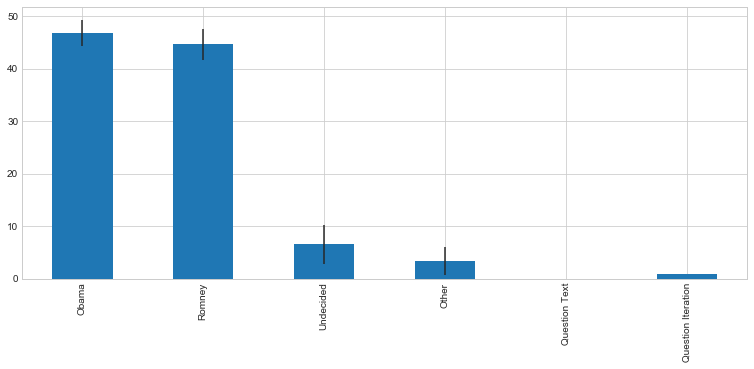

In [23]:
avg.plot(yerr=std,kind='bar',legend=False,figsize=(13,5))

In [24]:
poll_avg = pd.concat([avg,std],axis=1)

In [25]:
poll_avg.columns = ['AVG','STD']

In [26]:
poll_avg

,AVG,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


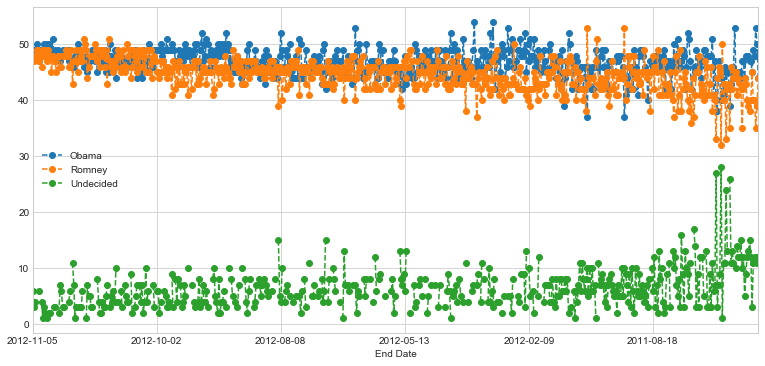

In [27]:
poll_df.plot('End Date',y=['Obama','Romney','Undecided'],figsize=(13,6),
            linestyle='--',marker='o')

In [28]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [29]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [30]:
poll_df_1 = poll_df.groupby('Start Date',as_index=False).mean()

In [31]:
poll_df_1.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


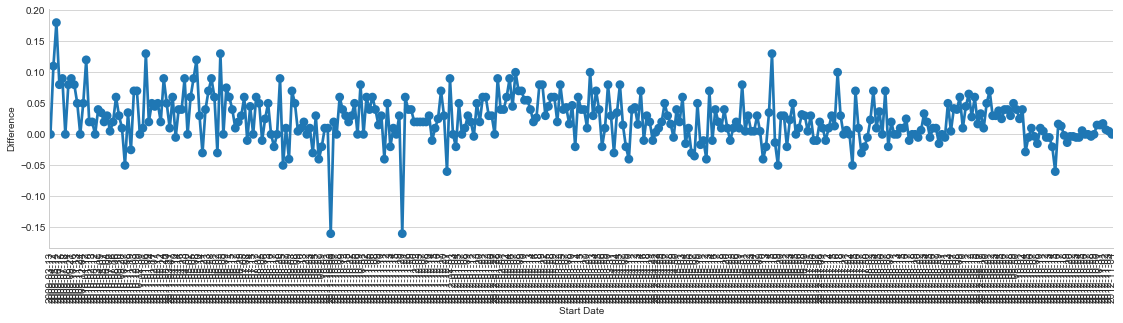

In [32]:
fig = sns.factorplot('Start Date','Difference',data=poll_df_1,aspect=4)
fig.set_xticklabels(rotation=90)

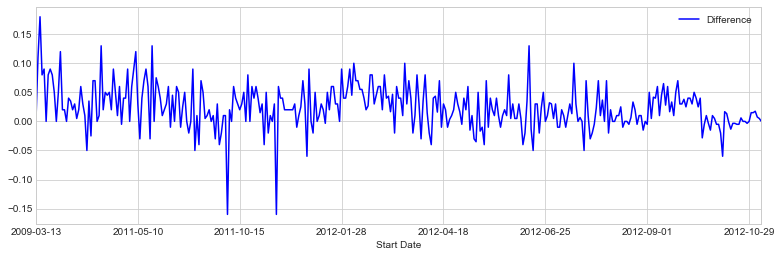

In [33]:
poll_df_1.plot('Start Date','Difference',figsize=(13,4),colormap='winter',)

In [34]:
row_in =0
xlimit = []

for date in poll_df_1['Start Date']:
    if date[:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print(xlimit[0])
print(xlimit[-1])
print(min(xlimit))
print(max(xlimit))

325
352
325
352


In [35]:
df1 = poll_df_1[325:352]
df1.index

Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
            338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
            351],
           dtype='int64')

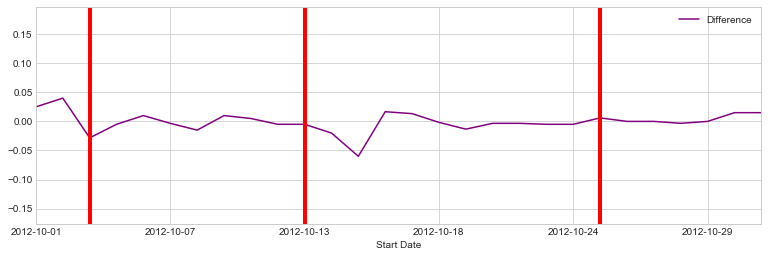

In [36]:
poll_df_1.plot('Start Date','Difference',figsize=(13,4),color='purple',xlim=(325,352))
#setting markers for debate dates
# for oct 3rd
plt.axvline(x=327,linewidth=4,color='r')
# for oct 11th
plt.axvline(x=335,linewidth=4,color='r')
# for oct 22
plt.axvline(x=346,linewidth=4,color='r')


Election Donor Analysis

In [37]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\607942840\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [39]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [40]:
donor_df.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [41]:
mean = np.mean(donor_df.contb_receipt_amt)

In [42]:
mean

298.2351500951093

In [43]:
std = np.std(donor_df.contb_receipt_amt)

In [44]:
std

3749.664851674943

In [45]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [46]:
top_donor.shape

(1001731,)

In [47]:
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [48]:
top_donor = top_donor[top_donor>0]

In [49]:
top_donor.value_counts()

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
20.00       17565
15.00       16163
150.00      14600
75.00       13647
201.20      11718
30.00       11381
300.00      11204
20.12        9897
5.00         9024
40.00        5007
2000.00      4128
55.00        3760
1500.00      3705
3.00         3383
60.00        3084
400.00       3066
110.00       2554
125.00       2520
19.00        2474
112.00       2457
            ...  
41.04           1
77.13           1
114.43          1
31.24           1
97.65           1
13.66           1
157.12          1
73.12           1
499.66          1
188.65          1
1197.50         1
122.32          1
144.88          1
77.88           1
19.53           1
188.60          1
47.10           1
19.85           1
28.83           1
202.59          1
9.25            1
202.66          1
1205.00         1
80.73           1
115.07    

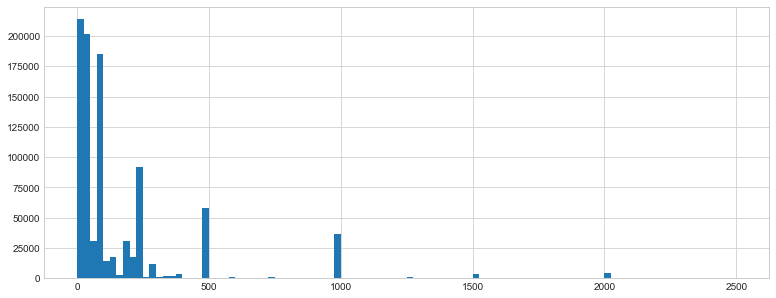

In [50]:
top_donor[top_donor < 2500].hist(bins=100,figsize=(13,5))

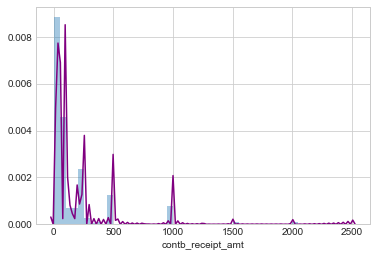

In [51]:
sns.distplot(top_donor[top_donor < 2500],kde_kws={'color':'purple'})

In [52]:
donor_df.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [68]:
party = []
for i in donor_df['cand_nm']:
    if i == 'Obama, Barack':
        party.append('Democrat')
    else:
        party.append('Republican')

In [69]:
party = pd.Series(party)

In [70]:
party.value_counts()

Democrat      593746
Republican    407985
dtype: int64

In [73]:
party = pd.DataFrame(party,columns=['Party'])

In [75]:
donor_df = donor_df.join(party)

In [77]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [78]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [92]:
 donor_df_1 = donor_df[['cand_nm','contb_receipt_amt']].groupby('cand_nm',as_index=False).agg('sum')

In [96]:
donor_df_1.round(1)

,cand_nm,contb_receipt_amt
0,"Bachmann, Michelle",2711439.3
1,"Cain, Herman",7101081.9
2,"Gingrich, Newt",12832769.7
3,"Huntsman, Jon",3330373.5
4,"Johnson, Gary Earl",566961.6
5,"McCotter, Thaddeus G",39030.0
6,"Obama, Barack",135877427.2
7,"Paul, Ron",21009619.8
8,"Pawlenty, Timothy",6004819.5
9,"Perry, Rick",20305754.0


In [98]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].agg('count')

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [108]:
for i in donor_df_1.index:
    print('{a1} has raised ${a2} amounts.'.format(a1 = donor_df_1.ix[i]['cand_nm'],
                                                  a2 = donor_df_1.ix[i]['contb_receipt_amt']))
    print('\n')

Bachmann, Michelle has raised $2711439.29 amounts.


Cain, Herman has raised $7101081.890000046 amounts.


Gingrich, Newt has raised $12832769.69 amounts.


Huntsman, Jon has raised $3330373.48 amounts.


Johnson, Gary Earl has raised $566961.6000000001 amounts.


McCotter, Thaddeus G has raised $39030.0 amounts.


Obama, Barack has raised $135877427.24000013 amounts.


Paul, Ron has raised $21009619.829994153 amounts.


Pawlenty, Timothy has raised $6004819.4799999995 amounts.


Perry, Rick has raised $20305753.999999974 amounts.


Roemer, Charles E. 'Buddy' III has raised $373009.8999999999 amounts.


Romney, Mitt has raised $88335907.53000028 amounts.


Santorum, Rick has raised $11043159.309999963 amounts.




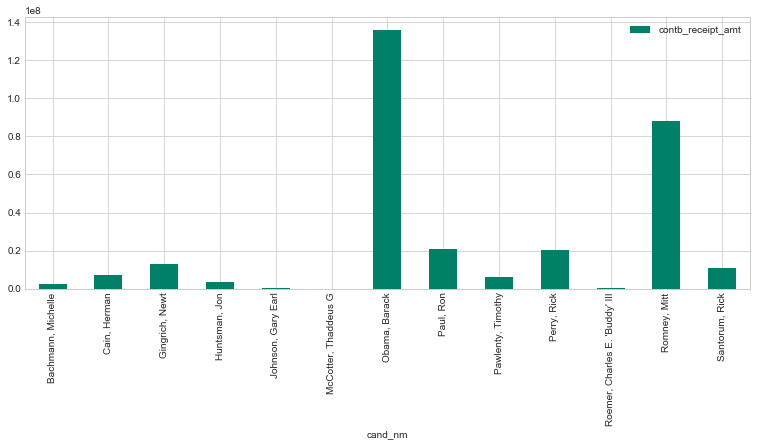

In [130]:
donor_df_1.plot(x= 'cand_nm',kind='bar',figsize=(13,5),colormap='summer')

Text(0.5,0.98,'Comparison of Contributions')

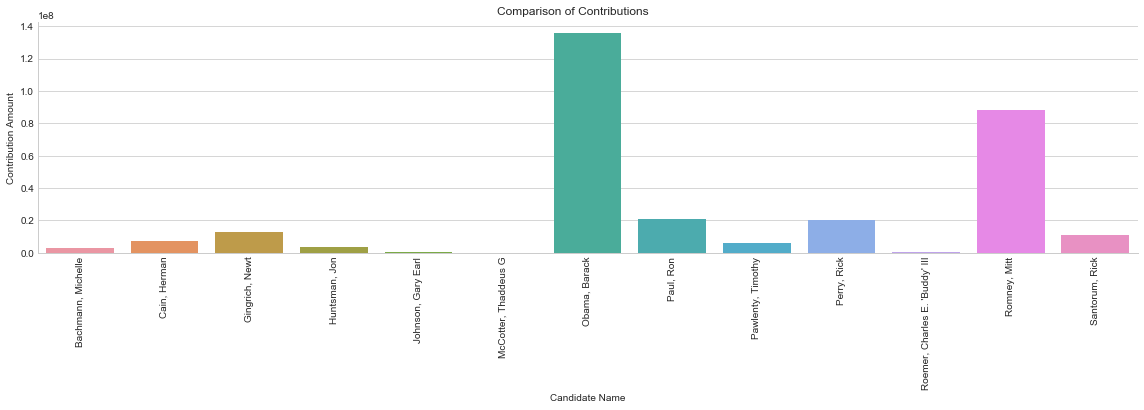

In [145]:
gr = sns.factorplot(x='cand_nm',y='contb_receipt_amt',data=donor_df_1,kind='bar',aspect=4)
gr.set_xticklabels(rotation=90)
gr.set_xlabels(label='Candidate Name')
gr.set_ylabels(label='Contribution Amount')
gr.fig.suptitle('Comparison of Contributions')

In [149]:
donor_df_party = donor_df.groupby('Party',as_index=False)['contb_receipt_amt'].agg('sum')

In [151]:
donor_df_party

,Party,contb_receipt_amt
0,Democrat,1.358774e+08
1,Republican,1.736539e+08


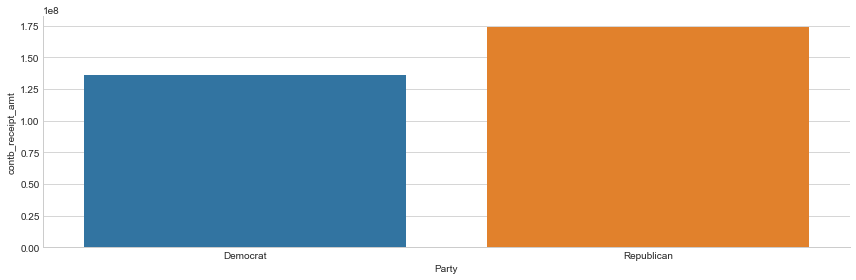

In [154]:
sns.factorplot('Party','contb_receipt_amt',data=donor_df_party,kind='bar',aspect=3)

In [169]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',
                                     columns='Party',aggfunc='sum')

In [170]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [186]:
occupation_df_1 = occupation_df[occupation_df > 1000000].dropna(how='all')

In [187]:
occupation_df_1

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,NaN,1.259469e+06
BUSINESS OWNER,NaN,1.323342e+06
C.E.O.,NaN,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,NaN,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,NaN,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [188]:
occupation_df_1.shape

(29, 2)

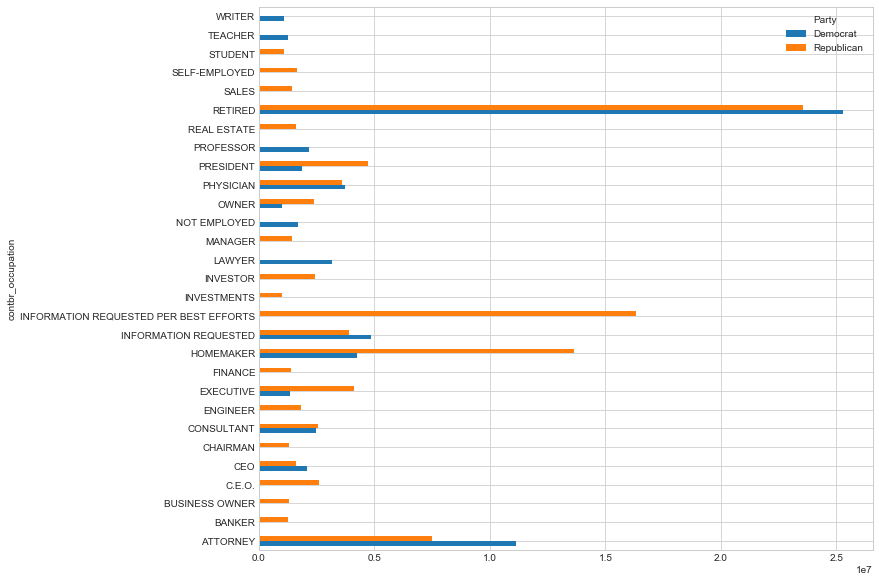

In [194]:
occupation_df_1.plot(kind='barh',figsize=(11,10))

In [196]:
occupation_df_1['CEO'] = occupation_df_1.loc['CEO']+occupation_df_1.loc['C.E.O.']

In [198]:
occupation_df_1.drop('C.E.O.',inplace=True)

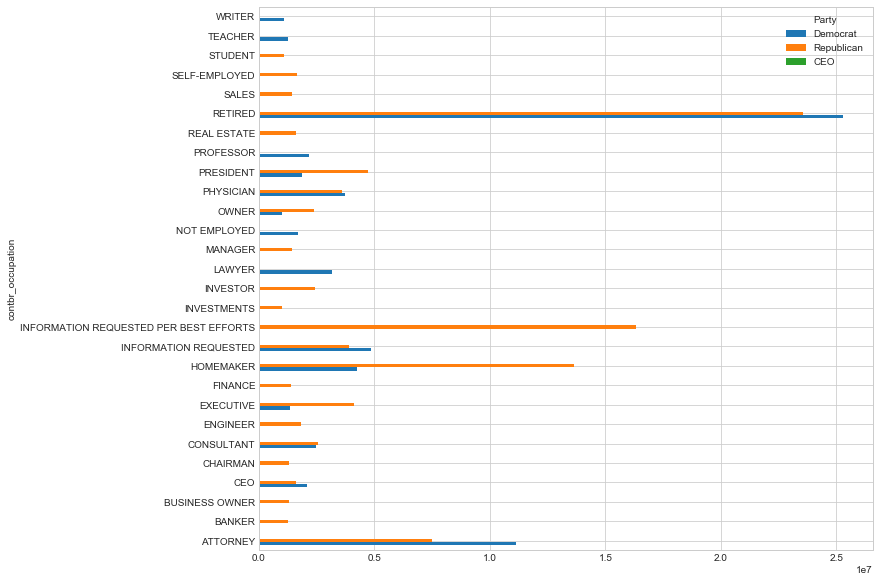

In [199]:
occupation_df_1.plot(kind='barh',figsize=(11,10))